In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [34]:
df = pd.read_csv('model_results/metric_results.csv', index_col=0)
metrics = np.unique(df['metric'])
datasets = np.unique(df['dataset'])
# models = np.unique(df['model'])
models = ['timesfm', 'moirai', 'chronos', 'lag-llama', 'nbeats', 'autoarima']
df

,dataset,model,metric,avg_result,1,2,3,4,5,6,...,39,40,41,42,43,44,45,46,47,48
0,amazon-google,timesfm,mase,0.626710,0.430666,0.500570,0.533389,0.549497,0.558109,0.564419,...,0.670660,0.664018,0.669928,0.669465,0.672305,0.673199,0.673113,0.677770,0.674093,0.671572
1,amazon-google,timesfm,tce,0.028167,0.027855,0.029167,0.017130,0.013426,0.014660,0.009028,...,0.040046,0.030710,0.021296,0.040586,0.025309,0.032330,0.029475,0.031559,0.027160,0.030247
2,amazon-google,timesfm,wql,0.003018,0.000005,0.000006,0.000006,0.000006,0.000006,0.000006,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007
3,amazon-google,timesfm,msis,1.969806,0.027855,0.029167,0.017130,0.013426,0.014660,0.009028,...,0.040046,0.030710,0.021296,0.040586,0.025309,0.032330,0.029475,0.031559,0.027160,0.030247
4,amazon-google,moirai,mase,0.784597,0.563127,0.659972,0.711802,0.725886,0.732351,0.724868,...,0.788507,0.815976,0.804093,0.811530,0.825072,0.817345,0.803175,0.808023,0.812145,0.832979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,meditation,nbeats,msis,10.094973,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.166667,0.200000,0.200000,0.200000,0.200000,0.200000
92,meditation,autoarima,mase,1.147695,0.728378,0.947715,0.991927,1.010030,1.061876,1.111716,...,1.260329,1.248421,1.216317,1.240416,1.242104,1.211267,1.164016,1.182075,1.218378,1.216701
93,meditation,autoarima,tce,0.166757,0.121405,0.127293,0.120875,0.121734,0.121469,0.132540,...,0.187867,0.185897,0.187130,0.186434,0.186381,0.189583,0.191503,0.189501,0.189460,0.190741
94,meditation,autoarima,wql,0.014102,0.000017,0.000022,0.000023,0.000023,0.000025,0.000026,...,0.000038,0.000039,0.000039,0.000039,0.000040,0.000040,0.000040,0.000040,0.000040,0.000041


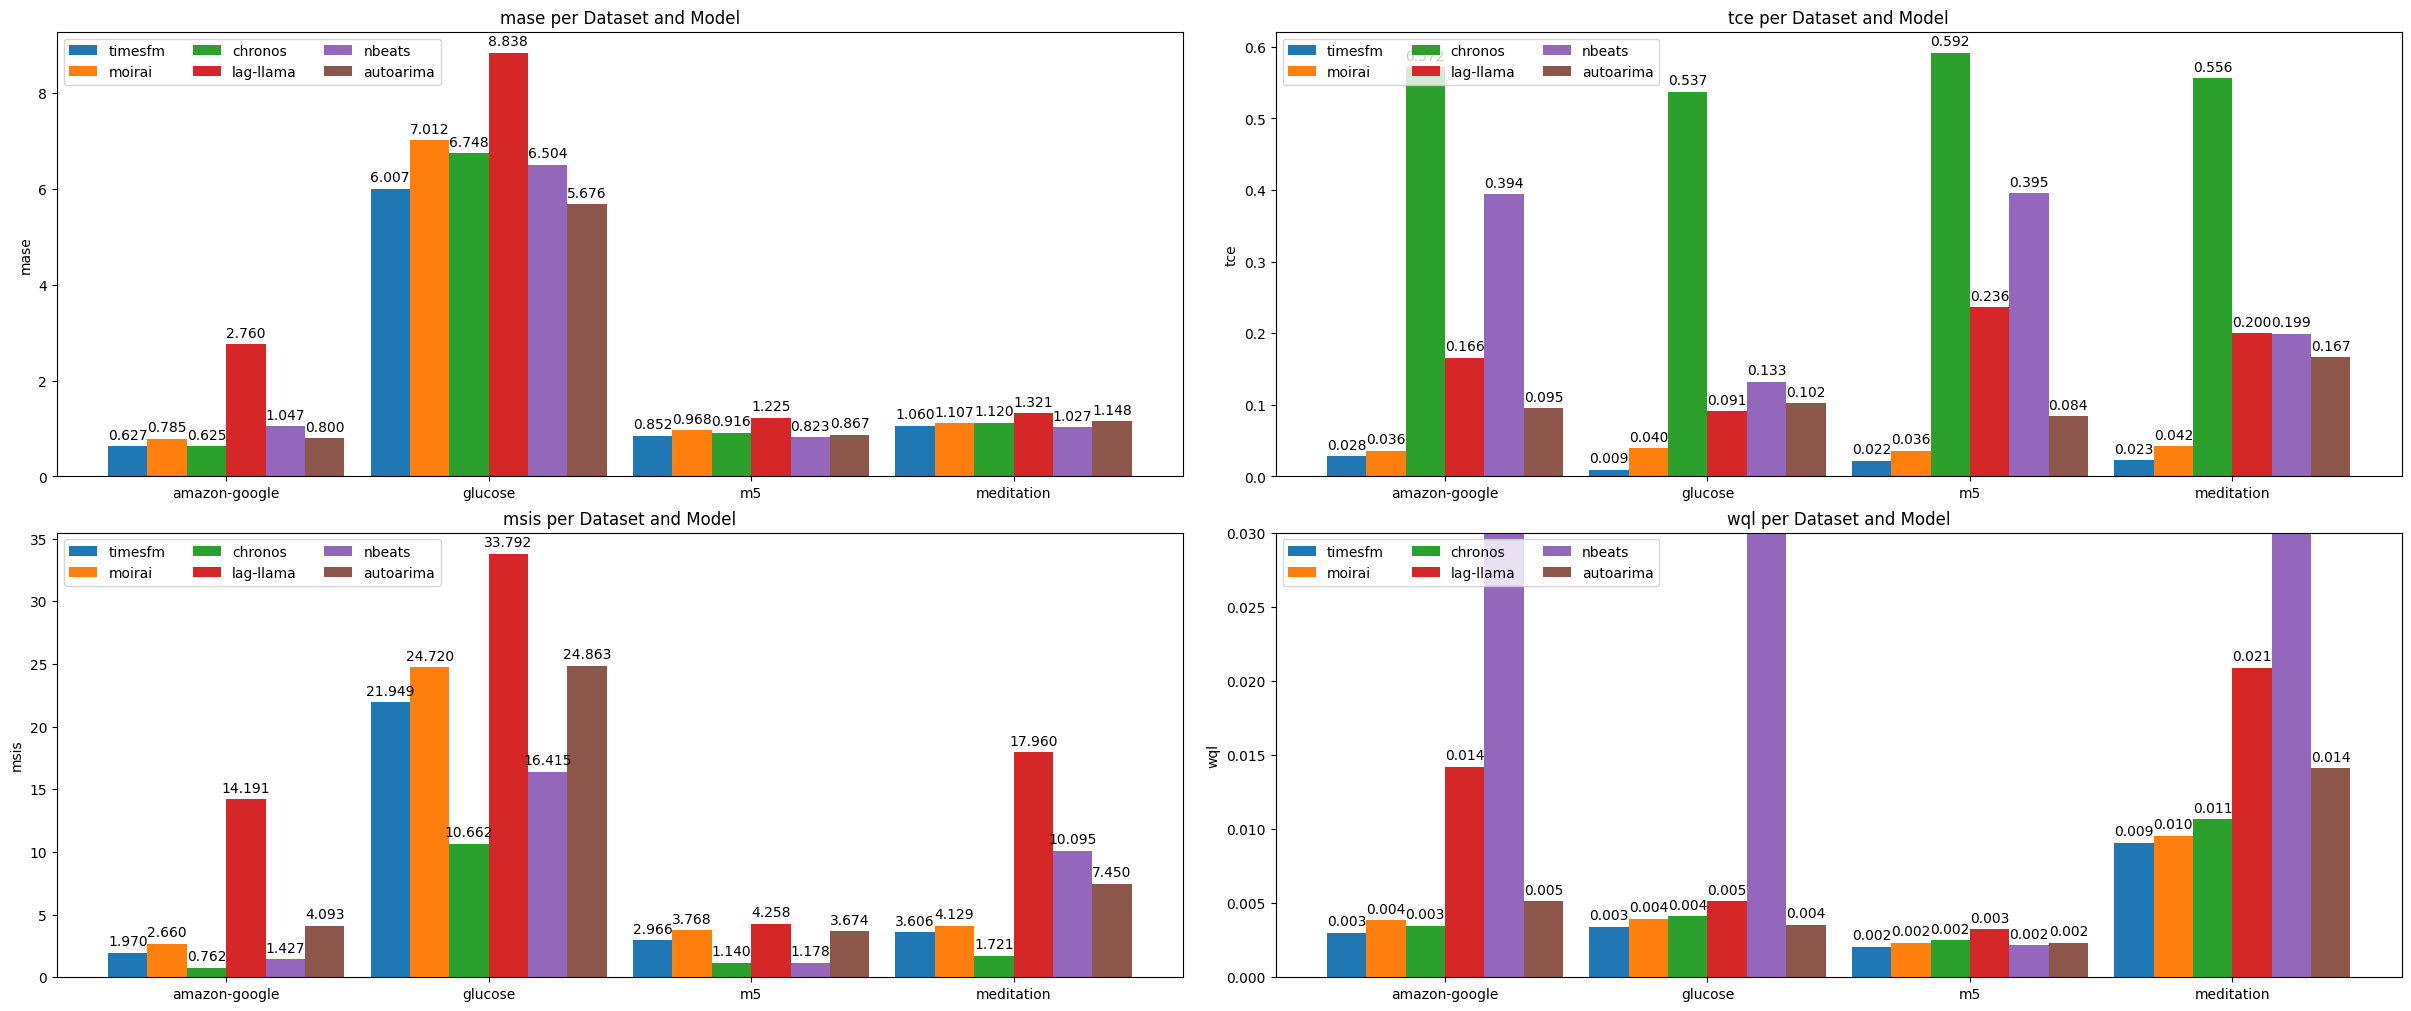

In [ ]:
# Bar plot of metrics on different datasets
fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(24,10))
width = 0.15
x = np.arange(len(datasets))
wql_top = 0.03

for i, metric in enumerate(metrics):
    ax = axes[i%2, i//2]
    multiplier = 0
    for model in models:
        values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
        offset = width * multiplier - width*(len(models)/2-1.5)
        rects = ax.bar(x + offset, values, width, label=model)
        ax.bar_label(rects, padding=3, fmt='%.3f')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per Dataset and Model')
    ax.set_xticks(x + width, datasets)
    ax.legend(loc='upper left', ncols=3)
    if metric=='wql':
        ax.set_ylim(top=wql_top)


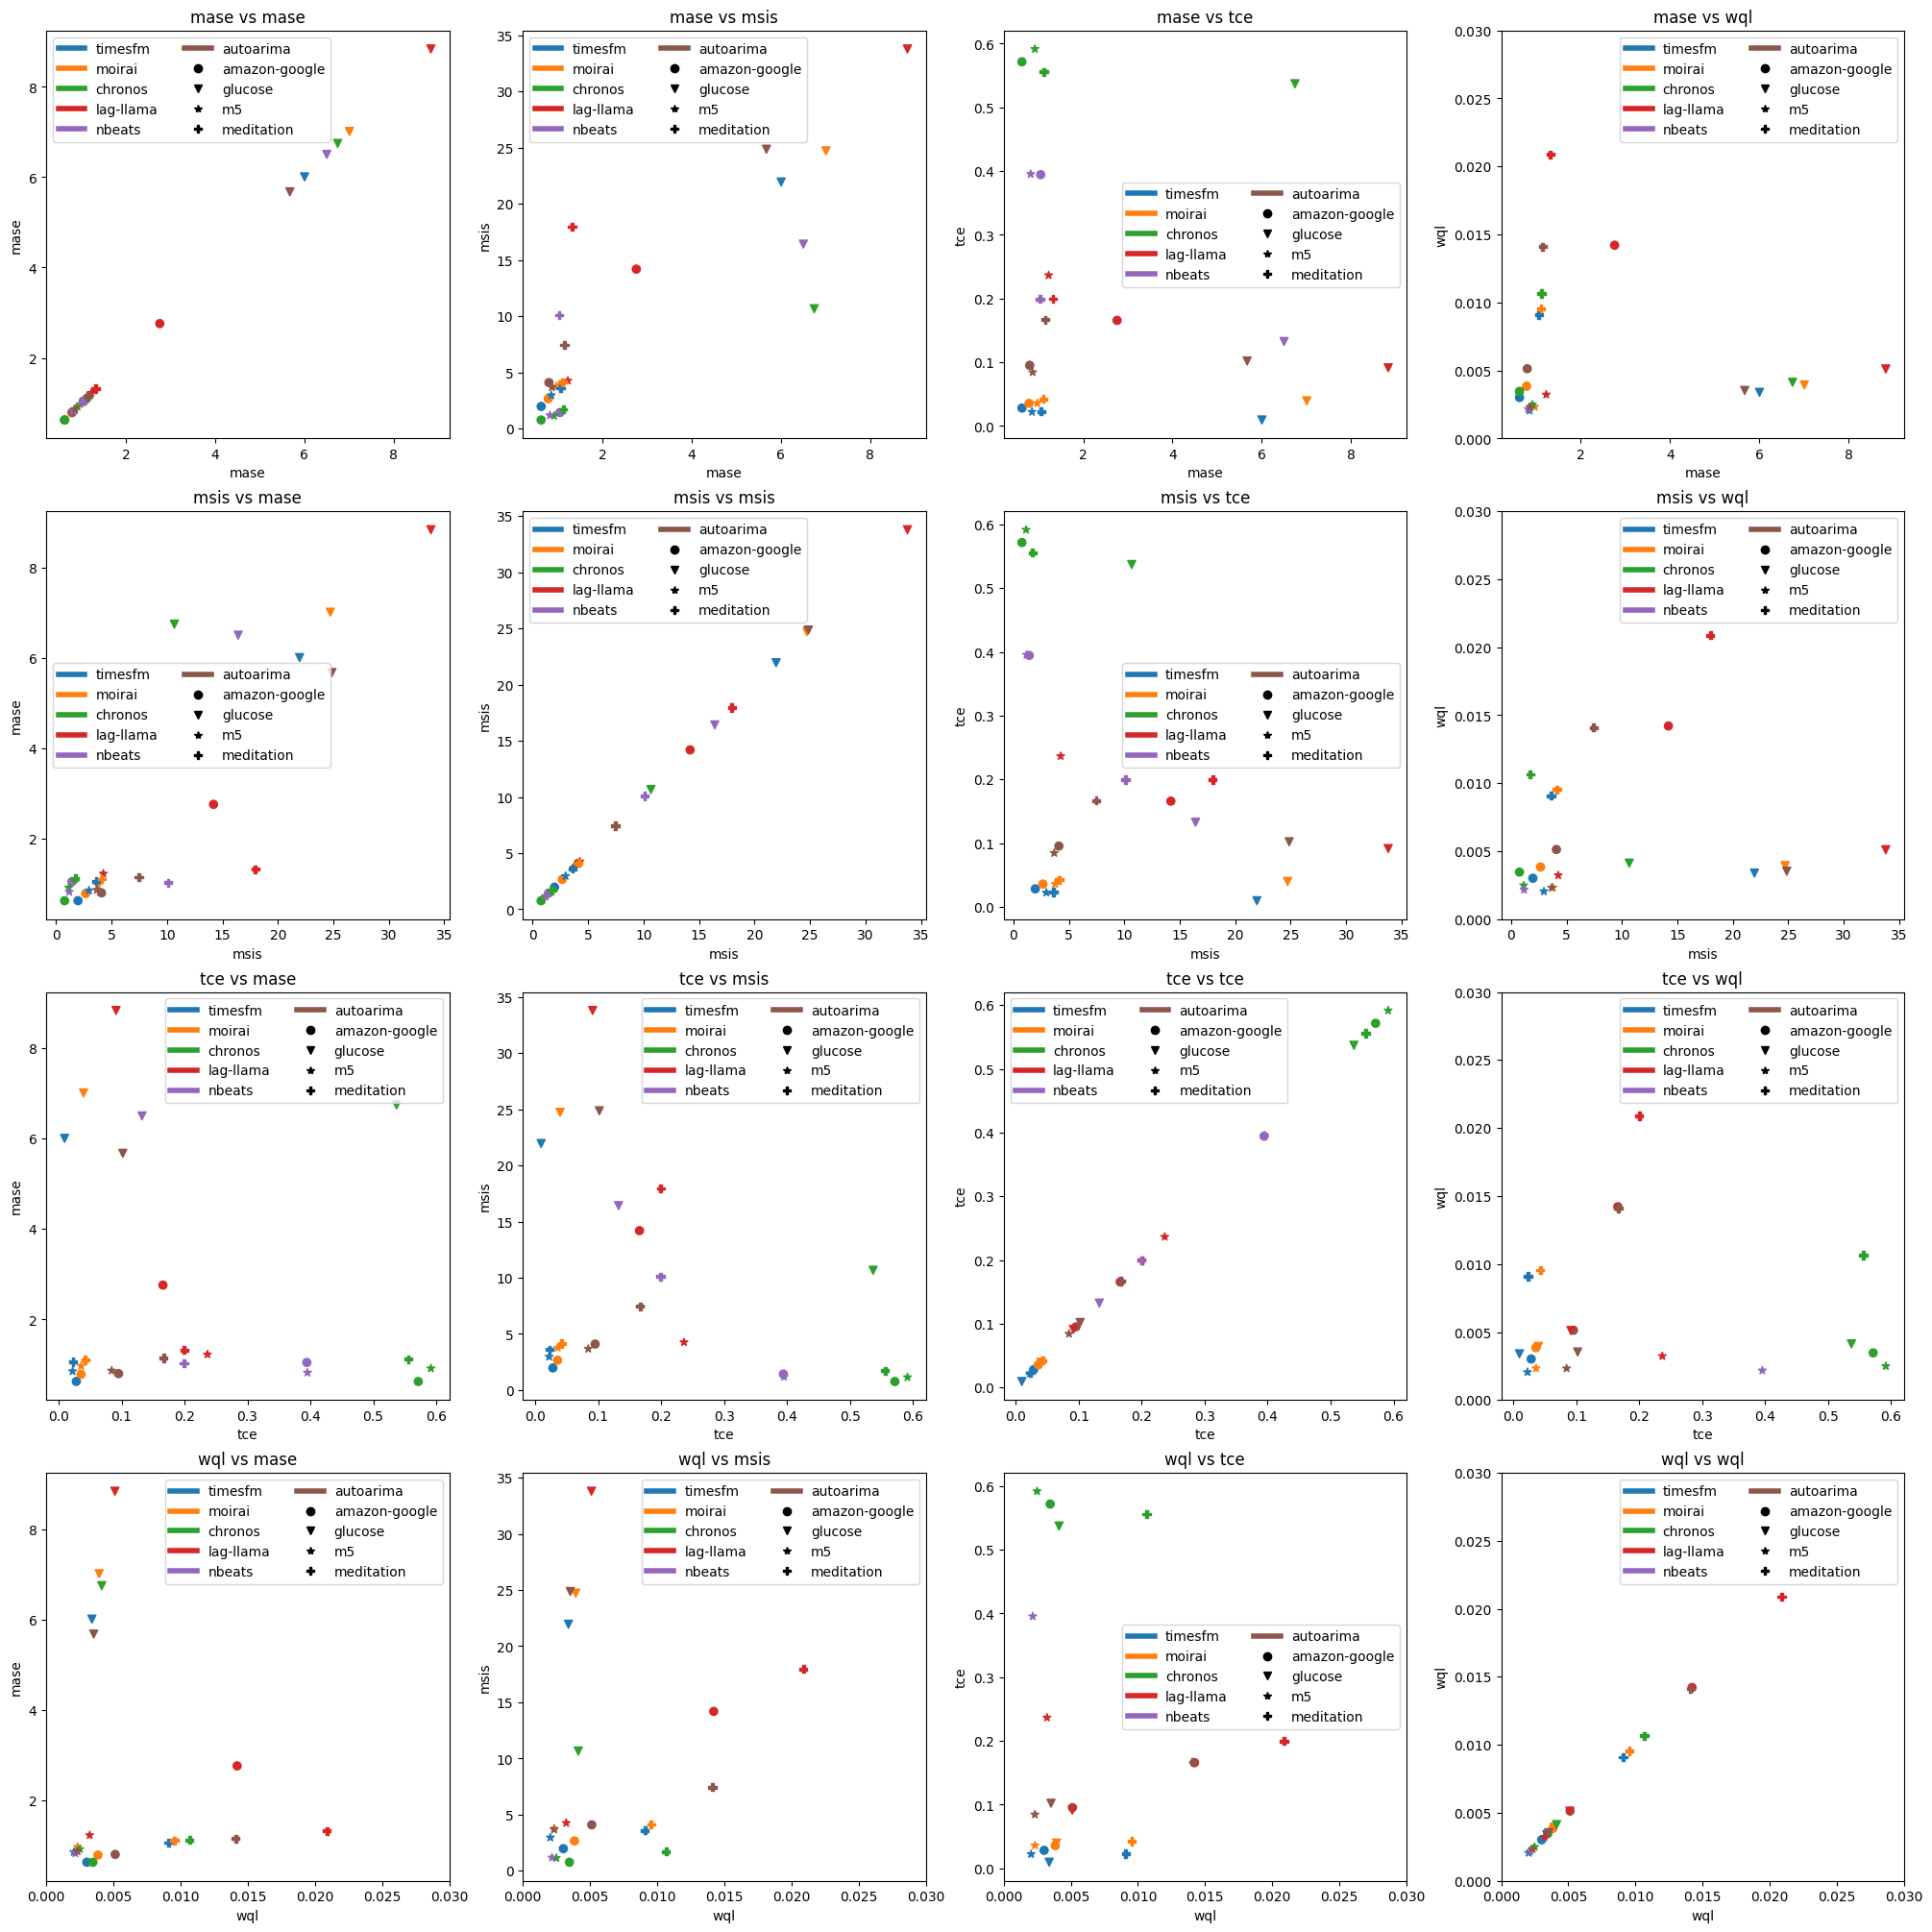

In [58]:
fig, axes = plt.subplots(4, 4, layout='constrained', figsize=(20,20))
model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
dataset_markers = ['o', 'v', '*', 'P']
wql_top = 0.03

custom_legend_dots = []
for model, model_color in zip(models, model_colors):
    custom_legend_dots.append(Line2D([0], [0], color=model_color, lw=4, label=model))
for dataset, marker in zip(datasets, dataset_markers):
    custom_legend_dots.append(Line2D([0], [0], color='black', marker=marker, markersize=6, lw=0))


for i, metric_x in enumerate(metrics):
    for j, metric_y in enumerate(metrics):
        ax = axes[i, j]
        for marker, dataset in zip(dataset_markers, datasets):
            x = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_x), 'avg_result'].item() for model in models]
            y = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_y), 'avg_result'].item() for model in models]
            ax.scatter(x, y, c=model_colors, marker=marker)

        ax.set_ylabel(metric_y)
        ax.set_xlabel(metric_x)
        ax.set_title(f'{metric_x} vs {metric_y}')
        if metric_x=='wql':
            ax.set_xlim(left=0, right=wql_top)
        if metric_y=='wql':
            ax.set_ylim(bottom=0, top=wql_top)
        ax.legend(custom_legend_dots, [*models, *datasets], ncols=2)

        